# 7FNCE043W Artificial Intelligence and Machine Learning in Finance Services

## Importing Libraries and Getting Started

In [1]:
#importing the necessary libraries

import pandas as pd # mathematical analysis library
import numpy as np # number and array manipulation
import matplotlib.pyplot as plt #  for plotting
import statistics as stats #Stats library
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import yfinance as yf
from ta.volume import MFIIndicator
import ta
from ta.momentum import roc  # Techinical Analysis library for feature generation
from ta import add_all_ta_features as ta
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from datetime import date
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score


#from ta.volatility import bollinger_bands

### Ticker Selection for NorvoNordisk

In [2]:
ticker = "NVO"
start = "2014-01-01"
end = "2023-12-29"
df = yf.download(ticker, start =start, end=end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,18.462000,18.493000,18.306999,18.361000,15.016382,1981000
2014-01-03,18.625999,18.690001,18.527000,18.607000,15.217576,2846000
2014-01-06,18.726999,18.757999,18.541000,18.555000,15.175044,3199000
2014-01-07,18.785999,18.834999,18.728001,18.806999,15.381137,3320000
2014-01-08,18.923000,18.982000,18.864000,18.934999,15.485823,4542000
...,...,...,...,...,...,...
2023-12-21,102.860001,103.480003,102.570000,103.480003,102.738754,3608900
2023-12-22,103.160004,103.559998,102.580002,102.709999,101.974266,2211100
2023-12-26,102.559998,103.129997,102.410004,102.680000,101.944481,1851400


In [3]:
open= df['Open']
high = df['High']
low = df['Low']
close =  df['Close']
adjclose = df['Adj Close'] 
volume = df['Volume']

### Exploratory Data Analysis on NVO

In [4]:
# making new dataframe to conduct EDA

df1 = pd.DataFrame({
'open' : df['Open'],
'high' : df['High'],
'low' : df['Low'],
'close' :  df['Close'],
'adjclose' : df['Adj Close'], 
'volume' : df['Volume']
})

df1

,open,high,low,close,adjclose,volume
Date,,,,,,
2014-01-02,18.462000,18.493000,18.306999,18.361000,15.016382,1981000
2014-01-03,18.625999,18.690001,18.527000,18.607000,15.217576,2846000
2014-01-06,18.726999,18.757999,18.541000,18.555000,15.175044,3199000
2014-01-07,18.785999,18.834999,18.728001,18.806999,15.381137,3320000
2014-01-08,18.923000,18.982000,18.864000,18.934999,15.485823,4542000
...,...,...,...,...,...,...
2023-12-21,102.860001,103.480003,102.570000,103.480003,102.738754,3608900
2023-12-22,103.160004,103.559998,102.580002,102.709999,101.974266,2211100
2023-12-26,102.559998,103.129997,102.410004,102.680000,101.944481,1851400


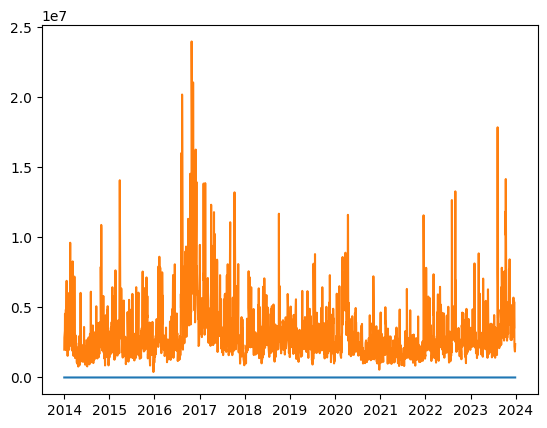

In [5]:
plt.plot(df1['close'])
plt.plot(df1['volume'])

In [6]:
# Checking for missing data
print(f'Data Types are: {df1.dtypes}')
print(f'Missing Values: {df1.isnull().sum()}')

Data Types are: open        float64
high        float64
low         float64
close       float64
adjclose    float64
volume        int64
dtype: object
Missing Values: open        0
high        0
low         0
close       0
adjclose    0
volume      0
dtype: int64


In [7]:
df1.describe()

,open,high,low,close,adjclose,volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,36.008198,36.281172,35.742217,36.026795,33.659179,3.176585e+06
std,19.776002,19.968651,19.603414,19.802909,20.466083,2.141440e+06
min,15.535000,15.805000,15.445000,15.785000,13.723353,3.886000e+05
25%,23.535000,23.647500,23.384999,23.517500,20.791018,1.918800e+06
50%,27.520000,27.719999,27.315001,27.490000,23.892262,2.559600e+06
75%,42.112501,42.385000,41.950001,42.254999,40.584505,3.723000e+06
max,104.879997,105.690002,104.150002,105.449997,104.694633,2.393740e+07


In [8]:
df1.max().head(10)

open        1.048800e+02
high        1.056900e+02
low         1.041500e+02
close       1.054500e+02
adjclose    1.046946e+02
volume      2.393740e+07
dtype: float64

In [9]:
df1.var().round(4)

open        3.910902e+02
high        3.987470e+02
low         3.842938e+02
close       3.921552e+02
adjclose    4.188606e+02
volume      4.585765e+12
dtype: float64

In [10]:
total = sum(df['Adj Close'].value_counts()) # total number of trading days
total

2515

Text(0, 0.5, 'freq')

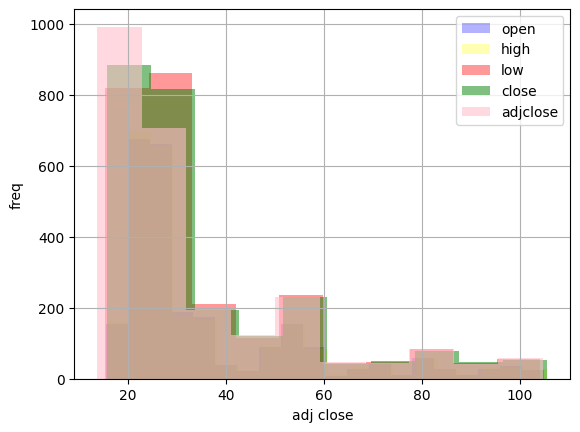

In [11]:
df1['open'].hist(color='blue', label= 'open', alpha =0.3, bins=20)
df1['high'].hist(color='yellow', label= 'high', alpha =0.3, bins=20)
df1['low'].hist(color='red', label= 'low', alpha =0.4)
df1['close'].hist(color='green', label= 'close', alpha =0.5)
df1['adjclose'].hist(color='pink', label='adjclose', alpha =0.6)
plt.legend()
plt.xlabel('adj close')
plt.ylabel('freq')


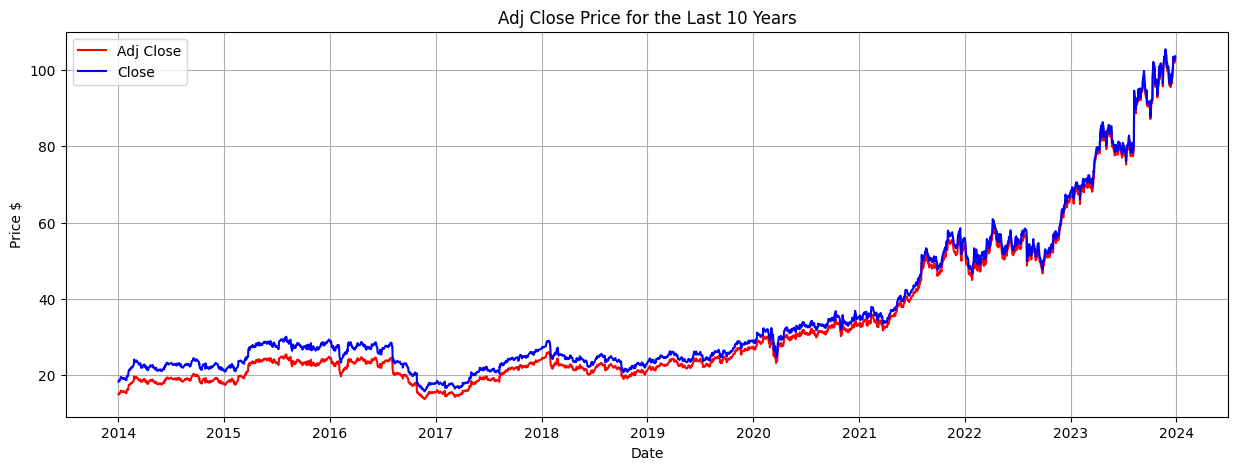

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(df1['adjclose'], color='red', label='Adj Close')
plt.plot(df1['close'], color='blue', label='Close')
plt.title('Adj Close Price for the Last 10 Years')
plt.ylabel('Price $')
plt.xlabel('Date')
plt.legend()
plt.ylim()
plt.xlim()
plt.grid()



In [13]:
df1.corr()

,open,high,low,close,adjclose,volume
open,1.000000,0.999896,0.999872,0.999773,0.998947,-0.059269
high,0.999896,1.000000,0.999850,0.999891,0.999066,-0.056088
low,0.999872,0.999850,1.000000,0.999901,0.999068,-0.062982
close,0.999773,0.999891,0.999901,1.000000,0.999150,-0.059447
adjclose,0.998947,0.999066,0.999068,0.999150,1.000000,-0.056246
volume,-0.059269,-0.056088,-0.062982,-0.059447,-0.056246,1.000000


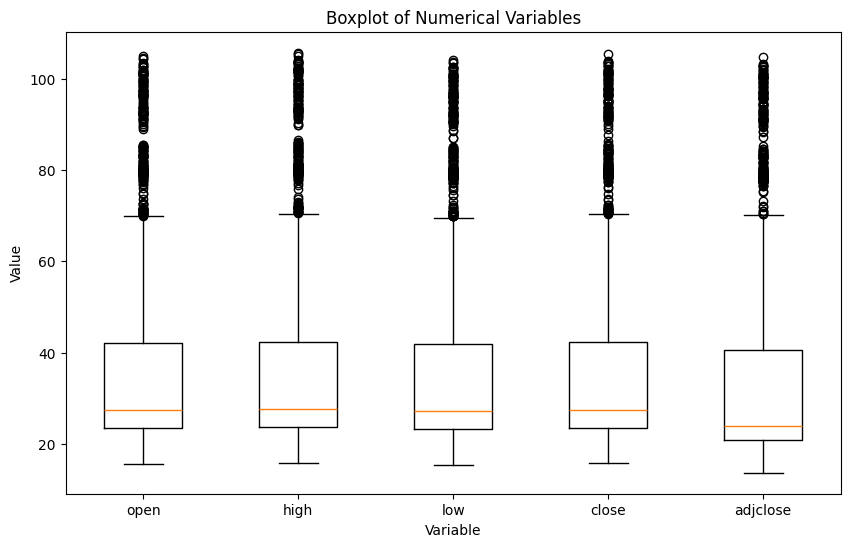

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(df1.drop(columns=['volume']).values, labels=df1.drop(columns=['volume']).columns)
plt.title('Boxplot of Numerical Variables')
plt.ylabel('Value')
plt.xlabel('Variable')
plt.show()

In [15]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1 < lower_bound) | (df1 > upper_bound)]
outliers['adjclose'].value_counts()

adjclose
77.826553     2
78.587379     2
70.380608     1
91.142418     1
92.855064     1
             ..
77.673393     1
77.060783     1
77.460953     1
77.579529     1
102.728821    1
Name: count, Length: 199, dtype: int64

##  Features For Feature Selection


##### Feature 1 : Daily Returns, The percentage change in price from the previous day's closing price.

In [16]:
import ta
dprice_pct = ta.others.daily_return(close, fillna=True)
df['drr'] = dprice_pct

df['drr']

Date
2014-01-02    0.000000
2014-01-03    1.339798
2014-01-06   -0.279465
2014-01-07    1.358119
2014-01-08    0.680599
                ...   
2023-12-21    2.141946
2023-12-22   -0.744109
2023-12-26   -0.029207
2023-12-27    0.973899
2023-12-28   -0.202545
Name: drr, Length: 2515, dtype: float64

In [17]:
dprice_pct.describe()

count    2515.000000
mean        0.082816
std         1.675103
min       -12.896920
25%        -0.769305
50%         0.086005
75%         0.973292
max        17.234753
Name: d_ret, dtype: float64

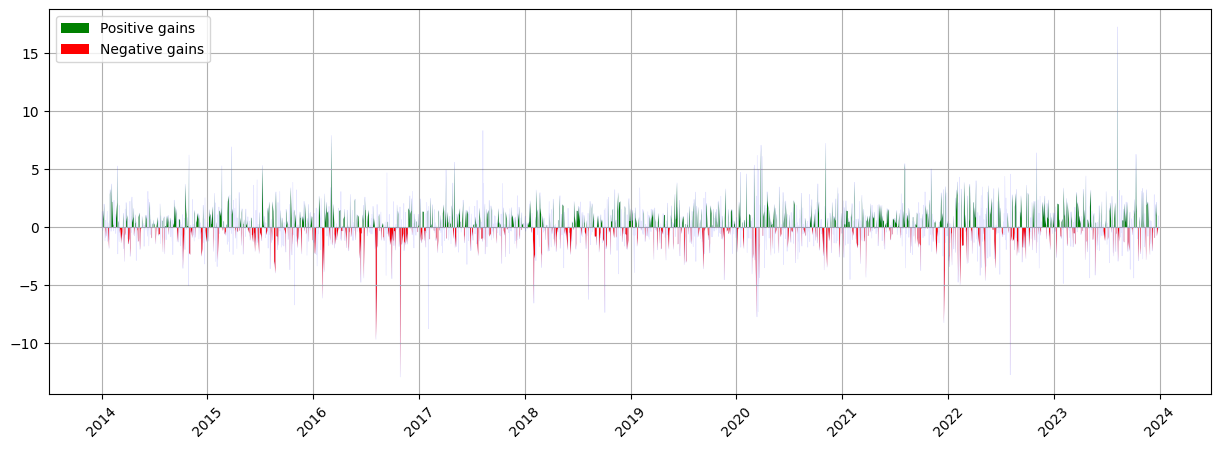

In [18]:
plt.figure(figsize =(15, 5))
plt.plot(dprice_pct, color ='blue', linewidth=0.5, alpha=0.1)
plt.fill_between(dprice_pct.index, 0, dprice_pct.where(dprice_pct > 0), facecolor='green', interpolate=True, label='Positive gains')
plt.fill_between(dprice_pct.index, 0, dprice_pct.where(dprice_pct < 0), facecolor='red', interpolate=True, label='Negative gains')
plt.grid()
plt.xticks(rotation =45)
plt.yticks()
plt.legend()

##### Feature 2: Rate of change (Momentum)

In [19]:
df['ROC'] = roc(df['Close'], window=20,fillna=True) # Rate of Change in momentum separted in 252 days to accouont for trading

(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723.]),
 [Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

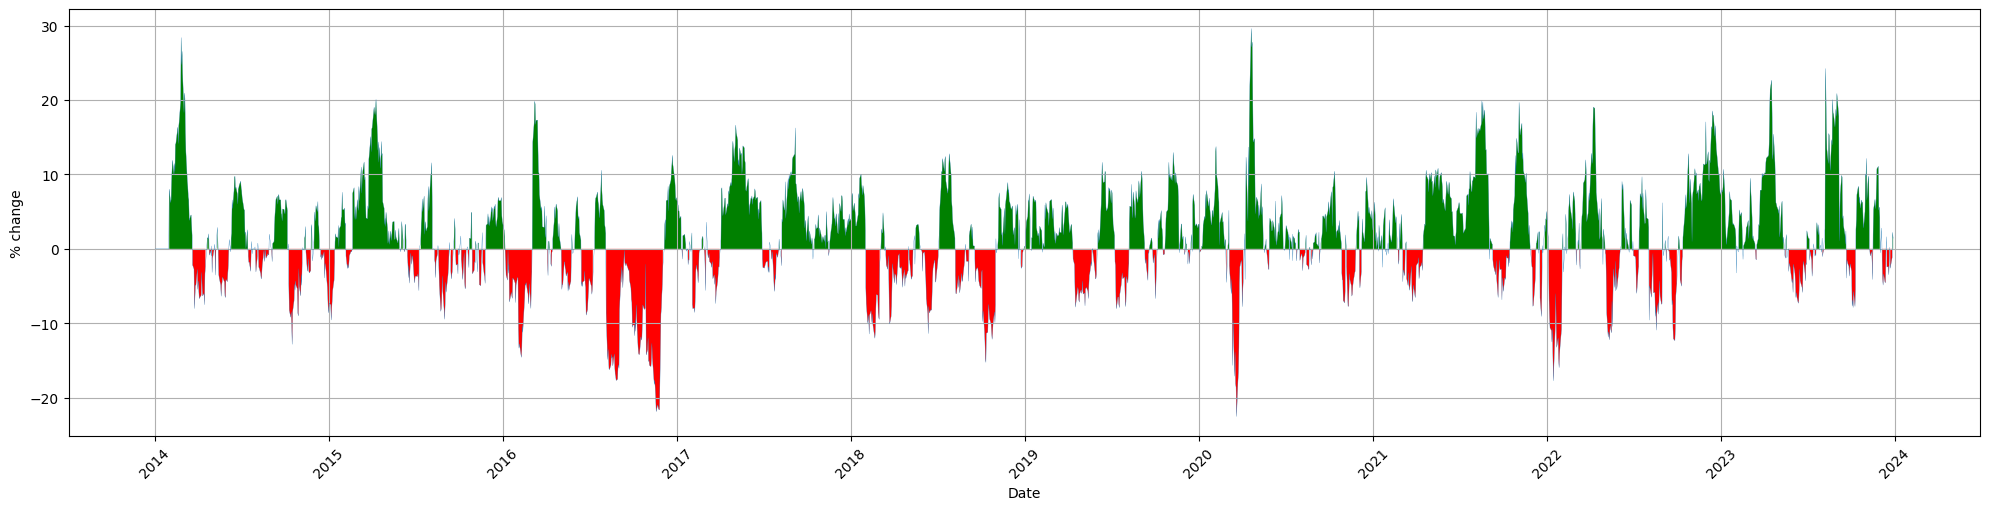

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(df['ROC'], linewidth= 0.2)
plt.fill_between(df['ROC'].index, 0, df['ROC'].where(df['ROC'] > 0), facecolor='green', interpolate=True, label='Positive gains',linewidth=2)
plt.fill_between(df['ROC'].index, 0, df['ROC'].where(df['ROC'] < 0), facecolor='red', interpolate=True, label='Negative gains')
plt.grid()
plt.ylabel('% change')
plt.xlabel('Date')
plt.tight_layout()
plt.xticks(rotation= 45)

##### Feature 3: Money Flow Index

In [21]:

mfi_values = ta.volume.money_flow_index(high=high, low=low, close=close, volume=volume, window=252, fillna=True)
df['mfi'] = mfi_values

In [22]:
df['mfi'].describe()

count    2515.000000
mean       52.671404
std         4.962124
min        43.092044
25%        49.726694
50%        52.376891
75%        55.059090
max       100.000000
Name: mfi, dtype: float64

(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723.]),
 [Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

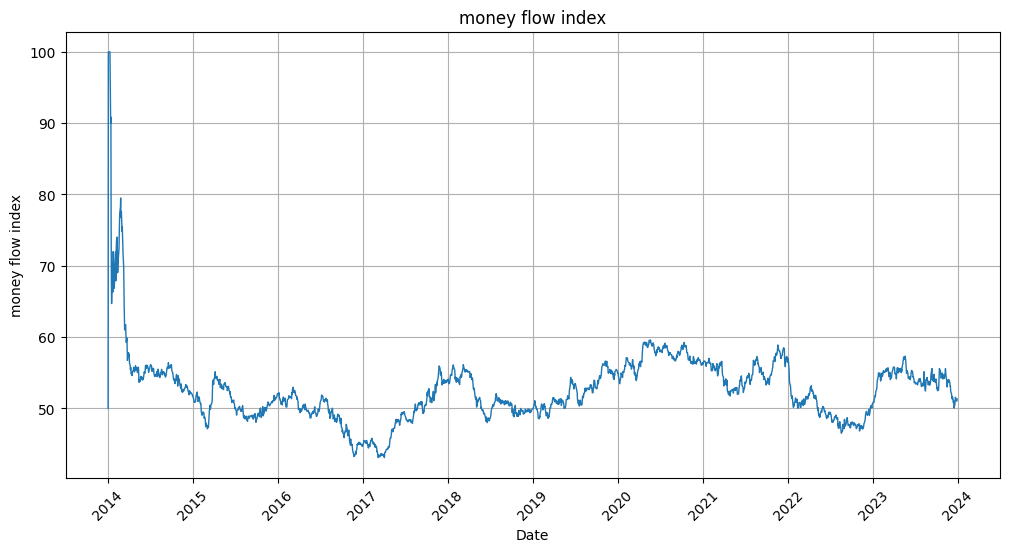

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(df['mfi'], linewidth= 1, alpha=1)
plt.tight_layout()
plt.grid()
plt.title('money flow index')
plt.ylabel('money flow index')
plt.xlabel('Date')
plt.xlim()
plt.xticks(rotation= 45)

#### Feature 4: Relative Strength Index

In [24]:
df['rsi'] = ta.momentum.rsi(close, window=252,fillna=True)

In [25]:
df['rsi'].describe()

count    2515.000000
mean       53.151795
std         4.633024
min        43.701961
25%        51.005663
50%        52.753293
75%        54.997285
max       100.000000
Name: rsi, dtype: float64

(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723.]),
 [Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

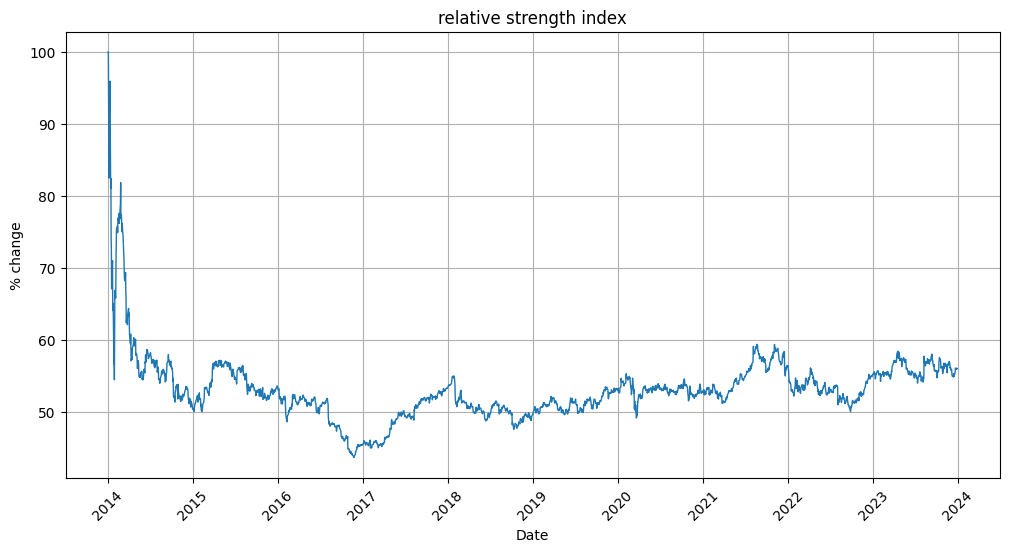

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(df['rsi'], linewidth= 1, alpha=1)
plt.tight_layout()
plt.grid()
plt.title('relative strength index')
plt.ylabel('% change')
plt.xlabel('Date')
plt.xlim()
plt.xticks(rotation= 45)

#### Feature 5: Bollinger Band Width

In [27]:
bb = ta.volatility.BollingerBands(close, window =252, window_dev=2, fillna=True)
bandwidth_values = bb.bollinger_wband()
df['bollbandbwidth'] = bandwidth_values

In [28]:
df['bollbandbwidth'].describe()

count    2515.000000
mean       37.667438
std        18.093182
min         0.000000
25%        22.837335
50%        32.151226
75%        51.082935
max        82.448324
Name: bollbandbwidth, dtype: float64

(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723.]),
 [Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

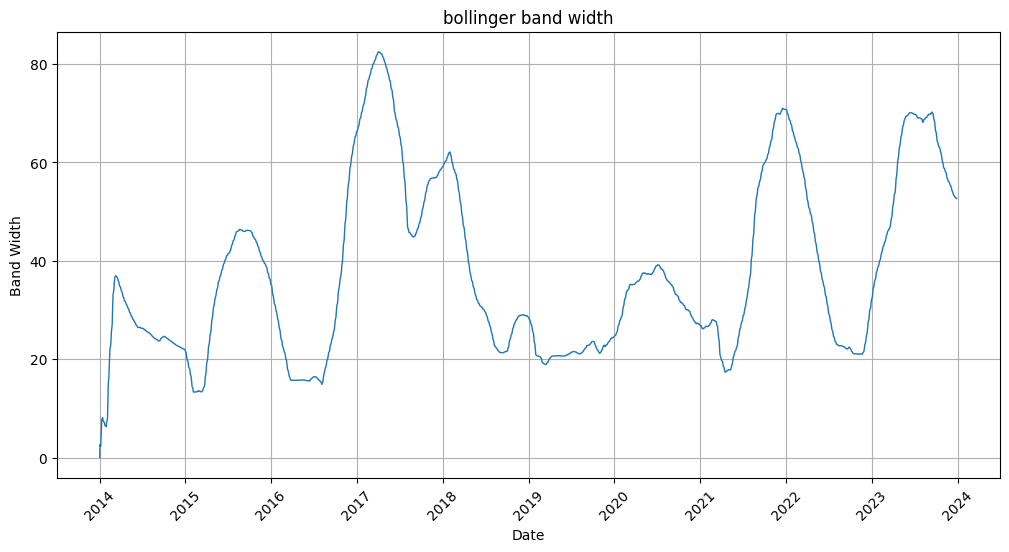

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(df['bollbandbwidth'], linewidth= 1, alpha=1)
plt.tight_layout()
plt.grid()
plt.title('bollinger band width')
plt.ylabel('Band Width')
plt.xlabel('Date')
plt.xlim()
plt.xticks(rotation= 45)

#### Feature 6: Avg True Range

In [30]:
atr = ta.volatility.AverageTrueRange(high, low, close, window = 252, fillna=True)
atr_values = atr.average_true_range()
df['atr'] = atr_values

In [31]:
df['atr'].describe()

count    2515.000000
mean        0.550820
std         0.345524
min         0.000000
25%         0.393410
50%         0.453272
75%         0.605600
max         1.628569
Name: atr, dtype: float64

(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723.]),
 [Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

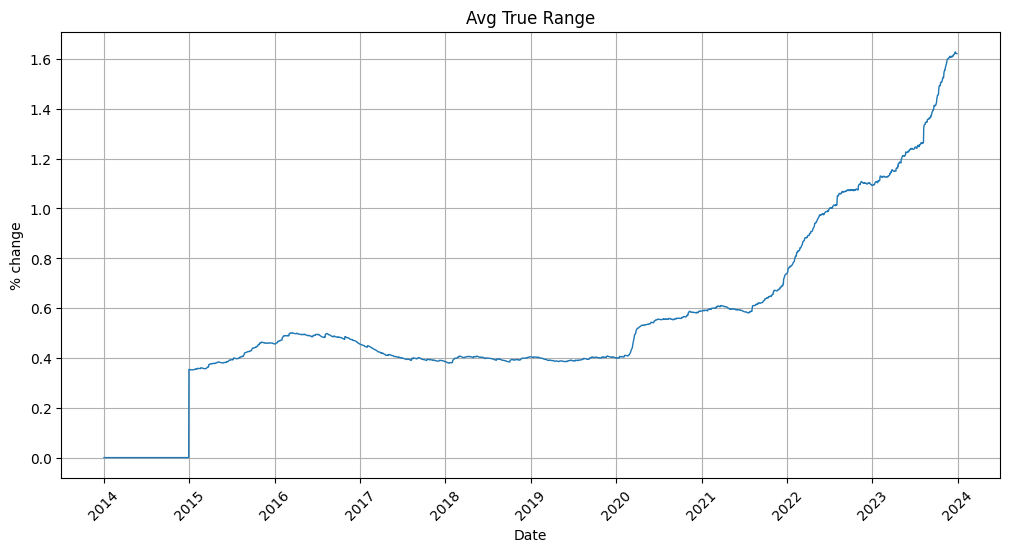

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(df['atr'], linewidth= 1, alpha=1)
plt.tight_layout()
plt.grid()
plt.title('Avg True Range')
plt.ylabel('% change')
plt.xlabel('Date')
plt.xlim()
plt.xticks(rotation= 45)

#### Feature 7: On-Balance Volume

In [33]:
obv = ta.volume.OnBalanceVolumeIndicator(close,volume, fillna=True)
obv_values = obv.on_balance_volume()
df['obv'] = obv_values

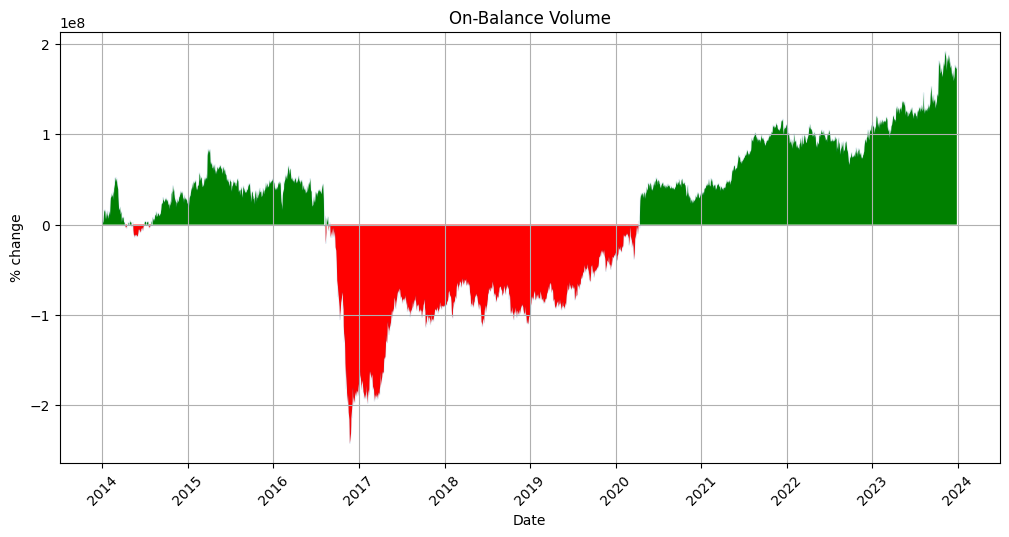

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(df['obv'], linewidth= 1, alpha=0.1)
plt.tight_layout()
plt.grid()
plt.title('On-Balance Volume')
plt.ylabel('% change')
plt.xlabel('Date')
plt.xlim()
plt.xticks(rotation= 45)
plt.fill_between(df['obv'].index, 0, df['obv'].where(df['obv'] > 0), facecolor='green', interpolate=True, label='Positive gains',linewidth=2)
plt.fill_between(df['obv'].index, 0, df['obv'].where(df['obv'] < 0), facecolor='red', interpolate=True, label='Negative gains')


#### Feature 8: Daily Log Returns 

In [35]:
dlr_values = ta.others.daily_log_return(close, fillna=True)
df['dlr'] = dlr_values

(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723.]),
 [Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

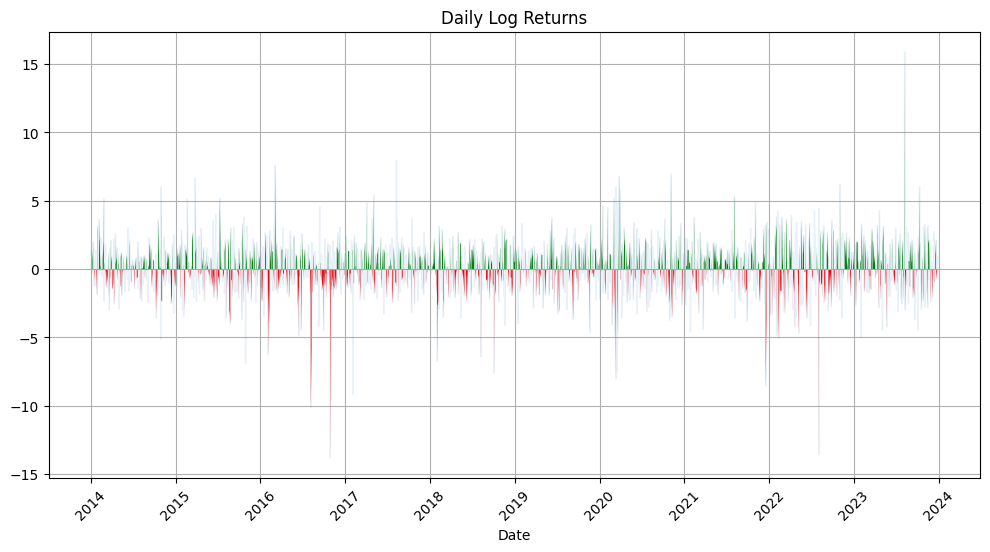

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(df['dlr'], linewidth= 1, alpha=0.1)
plt.tight_layout()
plt.grid()
plt.title('Daily Log Returns')
plt.fill_between(df['dlr'].index, 0, df['dlr'].where(df['dlr'] > 0), facecolor='green', interpolate=True, label='Positive gains',linewidth=2)
plt.fill_between(df['dlr'].index, 0, df['dlr'].where(df['dlr'] < 0), facecolor='red', interpolate=True, label='Negative gains')

plt.ylabel('')
plt.xlabel('Date')
plt.xlim()
plt.xticks(rotation= 45)

#### Feature 9: Rolling Windows Returns 

In [37]:
df_features= pd.DataFrame({
    'adjclose' : df['Adj Close'],
    'Rate of Change' : df['ROC'], 
    'Average True Range' : df['atr'],
    'On-Balance Volume' : df['obv'],
    'Relative Strength Index' : df['rsi'],
    'Bollinger Bands Width': df['bollbandbwidth'],
    'Downside Long Ratio': df['dlr'],
    'Money Flow Index' : df['mfi'],
    'Daily Returns' : df['drr']
     })



window_sizes = [20, 50] # Calculate 20-day and 50-day rolls

for window in window_sizes:
    df_features[f'Simple Moving Avg_{window}'] = df_features['adjclose'].rolling(window=window).mean().fillna(0)
    df_features[f'Expo Moving Avg_{window}'] = df_features['adjclose'].ewm(span=window, adjust=False).mean().fillna(0)
    df_features[f'STD_{window}'] = df_features['adjclose'].rolling(window=window).std().fillna(0)
    df_features[f'MIN_{window}'] = df_features['adjclose'].rolling(window=window).min().fillna(0)
    df_features[f'MAX_{window}'] = df_features['adjclose'].rolling(window=window).max().fillna(0)

In [38]:
df_features

,adjclose,Rate of Change,Average True Range,On-Balance Volume,Relative Strength Index,Bollinger Bands Width,Downside Long Ratio,Money Flow Index,Daily Returns,Simple Moving Avg_20,Expo Moving Avg_20,STD_20,MIN_20,MAX_20,Simple Moving Avg_50,Expo Moving Avg_50,STD_50,MIN_50,MAX_50
Date,,,,,,,,,,,,,,,,,,,
2014-01-02,15.016382,0.000000,0.000000,1981000,100.000000,0.000000,0.000000,50.000000,0.000000,0.000000,15.016382,0.000000,0.000000,0.000000,0.000000,15.016382,0.000000,0.000000,0.000000
2014-01-03,15.217576,0.000000,0.000000,4827000,100.000000,2.661765,1.330902,100.000000,1.339798,0.000000,15.035544,0.000000,0.000000,0.000000,0.000000,15.024272,0.000000,0.000000,0.000000
2014-01-06,15.175044,0.000000,0.000000,1628000,82.492990,2.287907,-0.279856,100.000000,-0.279465,0.000000,15.048829,0.000000,0.000000,0.000000,0.000000,15.030185,0.000000,0.000000,0.000000
2014-01-07,15.381137,0.000000,0.000000,4948000,90.545911,3.417403,1.348979,100.000000,1.358119,0.000000,15.080478,0.000000,0.000000,0.000000,0.000000,15.043948,0.000000,0.000000,0.000000
2014-01-08,15.485823,0.000000,0.000000,9490000,92.342228,4.291248,0.678293,100.000000,0.680599,0.000000,15.119082,0.000000,0.000000,0.000000,0.000000,15.061276,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,102.738754,0.213056,1.628569,176275700,56.126980,52.906584,2.119329,51.555384,2.141946,99.144680,98.926726,2.658296,95.520828,104.694633,98.878203,97.810231,2.583145,92.830238,104.694633
2023-12-22,101.974266,-2.598386,1.625996,174064600,55.952274,52.834508,-0.746892,51.249891,-0.744109,99.008662,99.216968,2.418120,95.520828,103.125961,98.928440,97.973526,2.618916,92.830238,104.694633
2023-12-26,101.944481,-1.145665,1.622400,172213200,55.945463,52.771356,-0.029212,51.010667,-0.029207,98.949588,99.476731,2.324876,95.520828,102.738754,98.939163,98.129250,2.630349,92.830238,104.694633


In [39]:
#sns.histplot(dataset,x="3day MA", kde=True, stat="density")

#### Target Variable

In [40]:
df_features['Pct_Change'] = df['Close'].pct_change().fillna(0) # calculating the % change 

df_features['Pct_Change'] = df_features['Pct_Change'] * 100

# Threshold
threshold = 0.08

df_features['Price_Rise'] = np.where(df_features['Pct_Change'] >= threshold, 1, 0) # Encode Target Variable



In [41]:
df_features['Pct_Change'].describe()

count    2515.000000
mean        0.082816
std         1.675103
min       -12.896920
25%        -0.769305
50%         0.086005
75%         0.973292
max        17.234753
Name: Pct_Change, dtype: float64

In [42]:
df_features

,adjclose,Rate of Change,Average True Range,On-Balance Volume,Relative Strength Index,Bollinger Bands Width,Downside Long Ratio,Money Flow Index,Daily Returns,Simple Moving Avg_20,...,STD_20,MIN_20,MAX_20,Simple Moving Avg_50,Expo Moving Avg_50,STD_50,MIN_50,MAX_50,Pct_Change,Price_Rise
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,15.016382,0.000000,0.000000,1981000,100.000000,0.000000,0.000000,50.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.016382,0.000000,0.000000,0.000000,0.000000,0
2014-01-03,15.217576,0.000000,0.000000,4827000,100.000000,2.661765,1.330902,100.000000,1.339798,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.024272,0.000000,0.000000,0.000000,1.339798,1
2014-01-06,15.175044,0.000000,0.000000,1628000,82.492990,2.287907,-0.279856,100.000000,-0.279465,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.030185,0.000000,0.000000,0.000000,-0.279465,0
2014-01-07,15.381137,0.000000,0.000000,4948000,90.545911,3.417403,1.348979,100.000000,1.358119,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.043948,0.000000,0.000000,0.000000,1.358119,1
2014-01-08,15.485823,0.000000,0.000000,9490000,92.342228,4.291248,0.678293,100.000000,0.680599,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.061276,0.000000,0.000000,0.000000,0.680599,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,102.738754,0.213056,1.628569,176275700,56.126980,52.906584,2.119329,51.555384,2.141946,99.144680,...,2.658296,95.520828,104.694633,98.878203,97.810231,2.583145,92.830238,104.694633,2.141946,1
2023-12-22,101.974266,-2.598386,1.625996,174064600,55.952274,52.834508,-0.746892,51.249891,-0.744109,99.008662,...,2.418120,95.520828,103.125961,98.928440,97.973526,2.618916,92.830238,104.694633,-0.744109,0
2023-12-26,101.944481,-1.145665,1.622400,172213200,55.945463,52.771356,-0.029212,51.010667,-0.029207,98.949588,...,2.324876,95.520828,102.738754,98.939163,98.129250,2.630349,92.830238,104.694633,-0.029207,0


In [43]:
df_checker = pd.DataFrame(df_features[['Pct_Change','Price_Rise']])
df_checker

,Pct_Change,Price_Rise
Date,,
2014-01-02,0.000000,0
2014-01-03,1.339798,1
2014-01-06,-0.279465,0
2014-01-07,1.358119,1
2014-01-08,0.680599,1
...,...,...
2023-12-21,2.141946,1
2023-12-22,-0.744109,0
2023-12-26,-0.029207,0


## Exploratory Data Analysis for Features

In [44]:
NVO_MAW = df_features.iloc[:, 8:18] # Moving Averages
NVO_TA = df_features.iloc[:, 0:8] # Technical Indicators

In [45]:
NVO_MAW.describe()

,Daily Returns,Simple Moving Avg_20,Expo Moving Avg_20,STD_20,MIN_20,MAX_20,Simple Moving Avg_50,Expo Moving Avg_50,STD_50,MIN_50
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
mean,0.082816,33.223214,33.337847,0.924370,31.663099,34.768505,32.529530,32.846009,1.399021,29.899595
std,1.675103,20.196714,20.031183,0.832483,19.128161,21.318377,19.769880,19.370365,1.228260,17.946111
min,-12.896920,0.000000,14.688928,0.000000,0.000000,0.000000,0.000000,15.016382,0.000000,0.000000
25%,-0.769305,20.923326,20.909868,0.394579,19.788960,21.810305,20.875813,20.914265,0.625451,19.050598
50%,0.086005,23.761310,23.709653,0.625990,22.798264,24.564947,23.571672,23.521754,0.952352,22.339493
75%,0.973292,39.722968,39.525434,1.134715,38.065685,40.704567,38.101460,38.190505,1.791524,35.287535
max,17.234753,100.704427,100.373804,6.668254,95.739250,104.694633,99.035269,98.490783,7.701229,92.830238


In [46]:
NVO_TA.describe()

,adjclose,Rate of Change,Average True Range,On-Balance Volume,Relative Strength Index,Bollinger Bands Width,Downside Long Ratio,Money Flow Index
count,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.000000,2515.000000,2515.000000,2515.000000
mean,33.659179,1.559918,0.550820,9.535133e+06,53.151795,37.667438,0.068750,52.671404
std,20.466083,6.860079,0.345524,8.464548e+07,4.633024,18.093182,1.676954,4.962124
min,13.723353,-22.537196,0.000000,-2.420690e+08,43.701961,0.000000,-13.807794,43.092044
25%,20.791018,-2.668012,0.393410,-6.985140e+07,51.005663,22.837335,-0.772279,49.726694
50%,23.892262,1.456780,0.453272,3.350900e+07,52.753293,32.151226,0.085968,52.376891
75%,40.584505,5.790941,0.605600,7.373250e+07,54.997285,51.082935,0.968586,55.059090
max,104.694633,29.619898,1.628569,1.917023e+08,100.000000,82.448324,15.900817,100.000000


In [47]:
NVO_MAW.var(numeric_only=True)

Daily Returns             2.805970
Simple Moving Avg_20    407.907251
Expo Moving Avg_20      401.248277
STD_20                    0.693027
MIN_20                  365.886558
MAX_20                  454.473212
Simple Moving Avg_50    390.848159
Expo Moving Avg_50      375.211039
STD_50                    1.508621
MIN_50                  322.062910
dtype: float64

In [48]:
NVO_TA.var(numeric_only=True)

adjclose                   4.188606e+02
Rate of Change             4.706069e+01
Average True Range         1.193869e-01
On-Balance Volume          7.164858e+15
Relative Strength Index    2.146491e+01
Bollinger Bands Width      3.273632e+02
Downside Long Ratio        2.812174e+00
Money Flow Index           2.462267e+01
dtype: float64

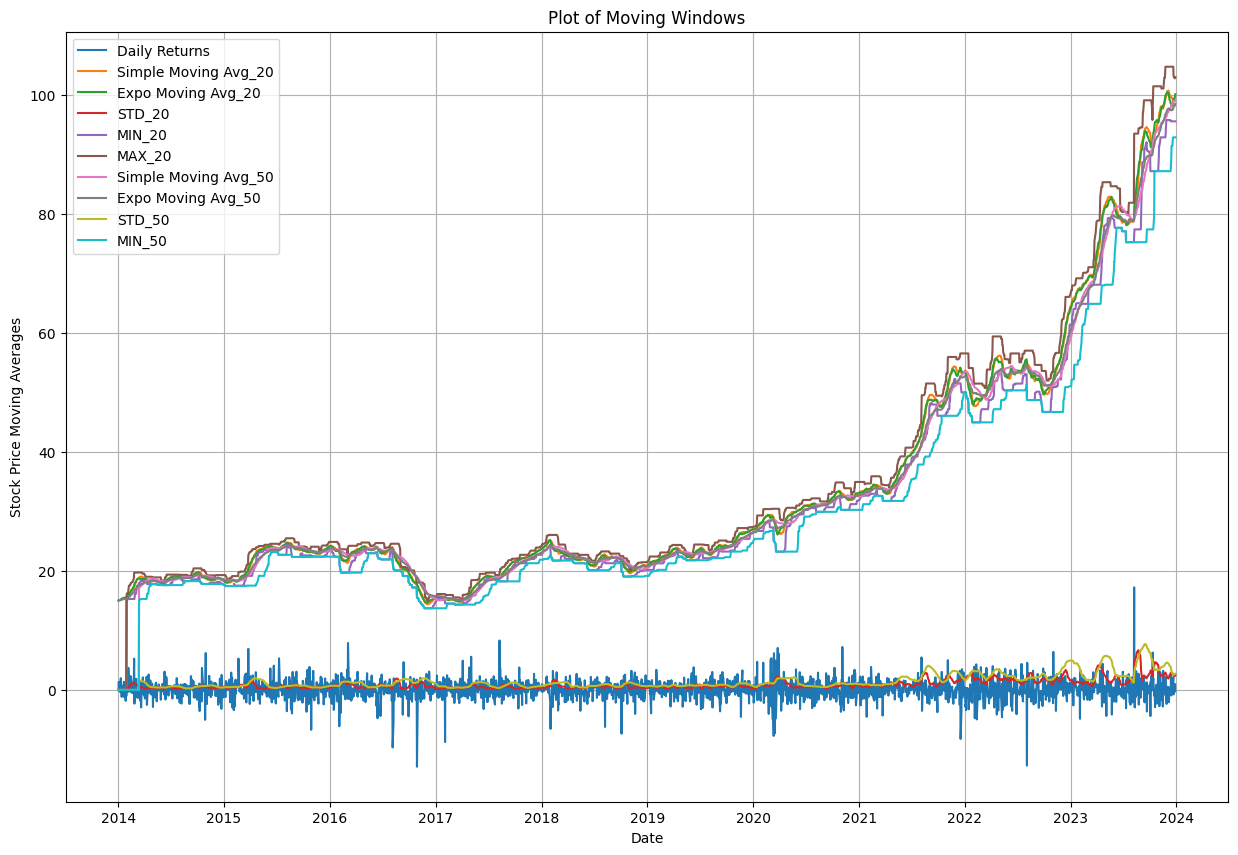

In [49]:
plt.figure(figsize=(15, 10))
plt.plot(NVO_MAW, label= NVO_MAW.columns) # Z contains Moving Average Windows 
#plt.plot(A, label=A.columns)
plt.title('Plot of Moving Windows')
plt.ylabel('Stock Price Moving Averages')
plt.xlabel('Date')
plt.legend()
plt.ylim()
plt.xlim()
plt.grid()
plt.show()

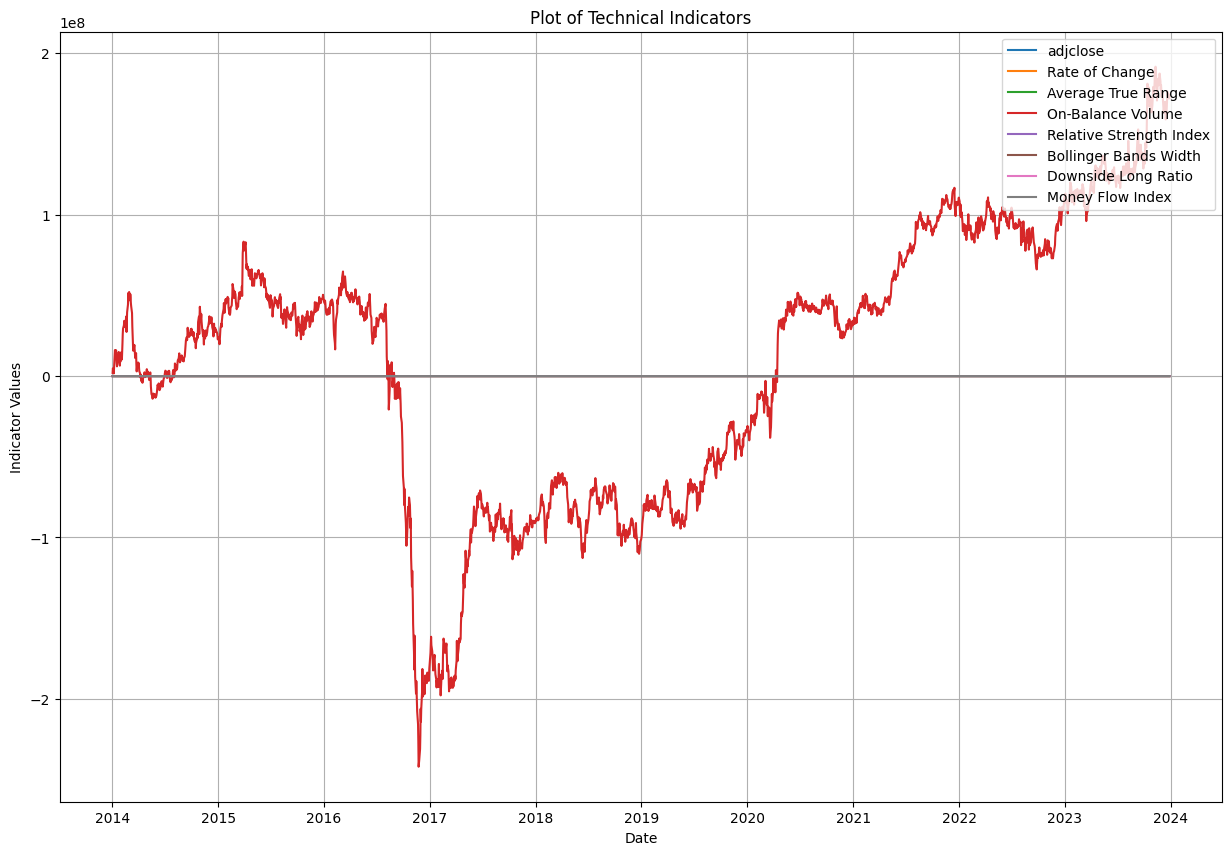

In [50]:
plt.figure(figsize=(15, 10))
plt.plot(NVO_TA, label=NVO_TA.columns)
plt.title('Plot of Technical Indicators')
plt.ylabel('Indicator Values')
plt.xlabel('Date')
plt.legend(loc='upper right')
plt.ylim()
plt.xlim()
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'freq')

<Figure size 1000x500 with 0 Axes>

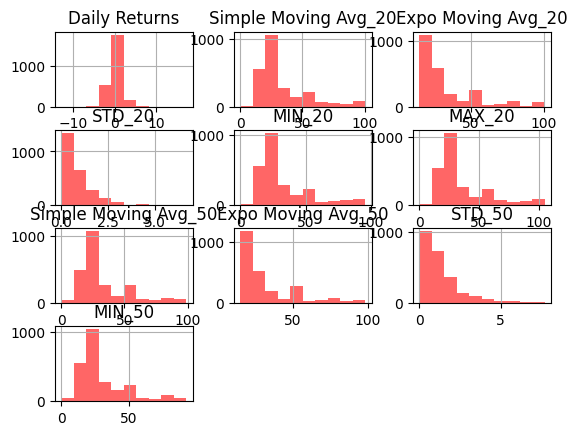

In [51]:
plt.figure(figsize=(10, 5))
NVO_MAW.hist(color='red', label='adjclose', alpha =0.6)
plt.title('plot of Distrubtion')
plt.legend()
plt.xlabel('adj close')
plt.ylabel('freq')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'freq')

<Figure size 1000x500 with 0 Axes>

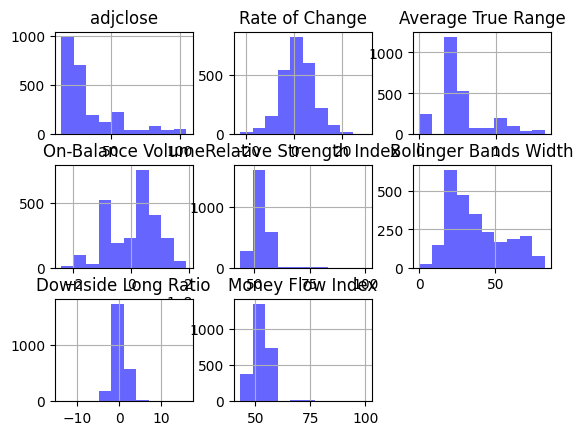

In [52]:
plt.figure(figsize=(10, 5))
NVO_TA.hist(color='blue', label='adjclose', alpha =0.6)
plt.legend()
plt.xlabel('adj close')
plt.ylabel('freq')

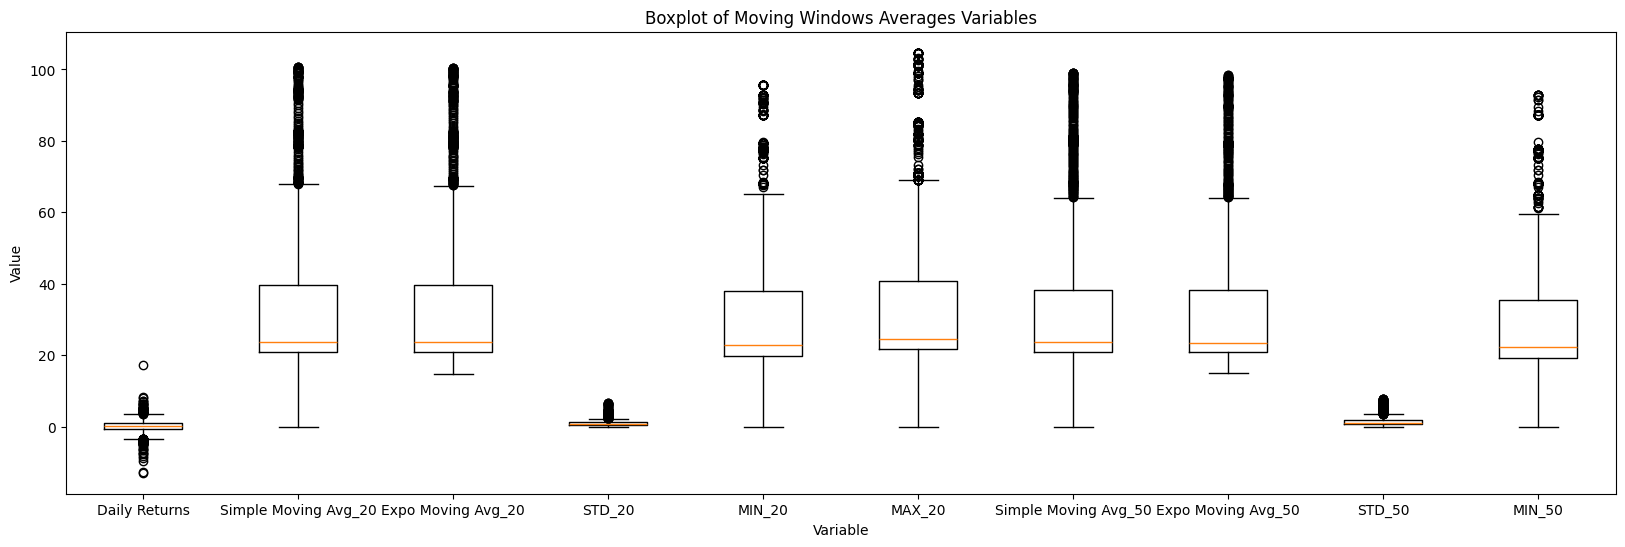

In [53]:
plt.figure(figsize=(20, 6))
plt.boxplot(NVO_MAW.values, labels=NVO_MAW.columns)
plt.title('Boxplot of Moving Windows Averages Variables')
plt.ylabel('Value')
plt.xlabel('Variable')
plt.show()

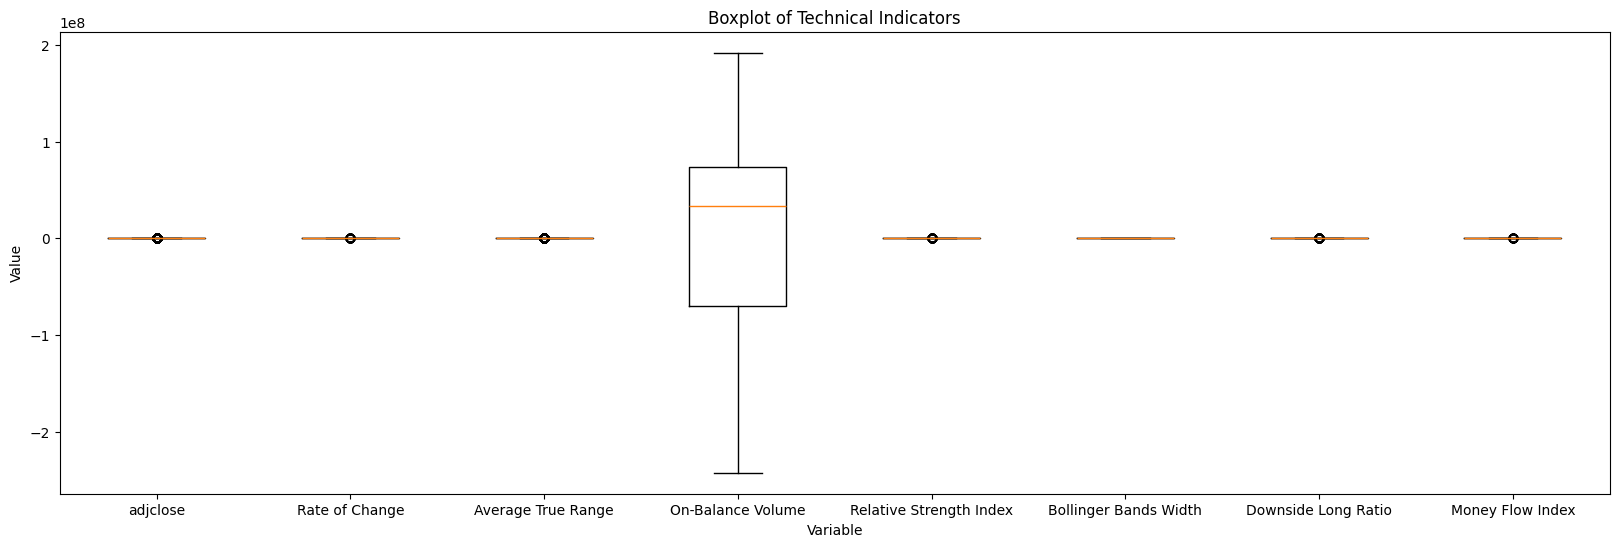

In [54]:
plt.figure(figsize=(20, 6))
plt.boxplot(NVO_TA.values, labels=NVO_TA.columns)
plt.title('Boxplot of Technical Indicators')
plt.ylabel('Value')
plt.xlabel('Variable')
plt.show()

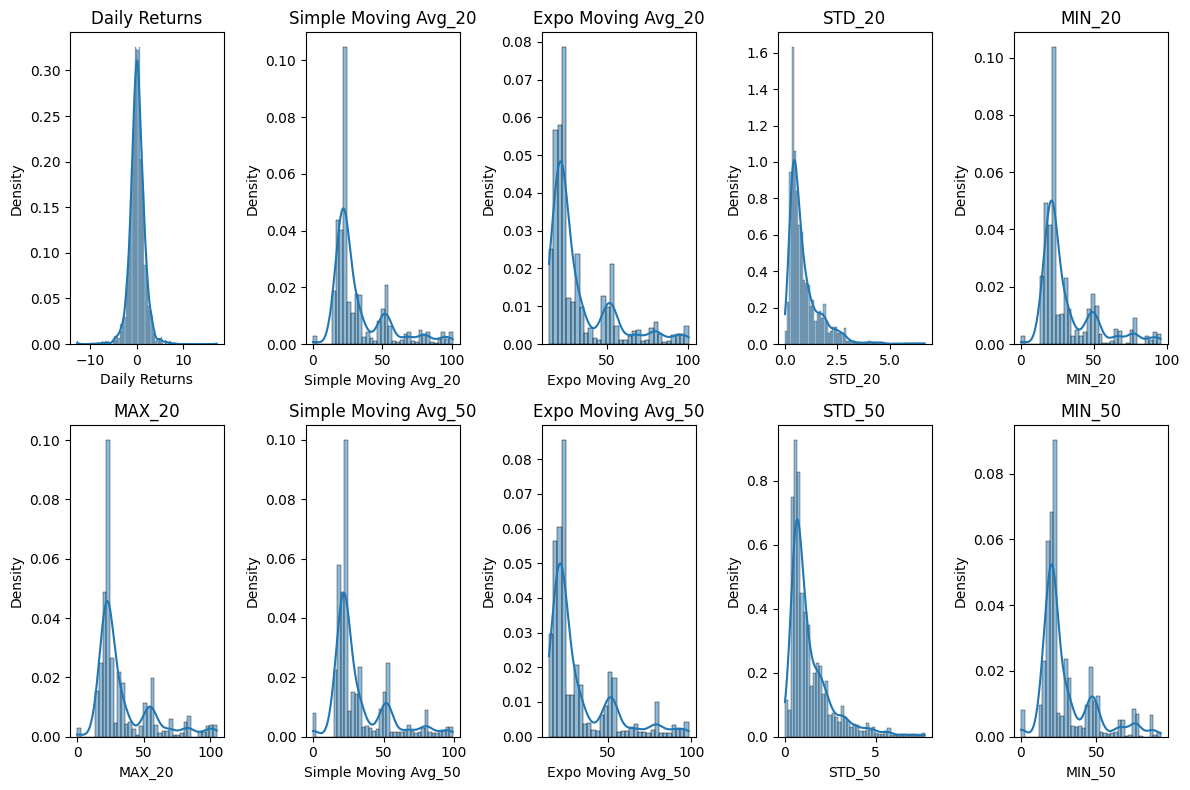

In [55]:
num_cols = 5
num_rows = (len(NVO_MAW.columns) + num_cols - 1) // num_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the columns in NVO_MAW
for i, column in enumerate(NVO_MAW.columns):
    # Select the corresponding axis for the current subplot
    ax = axes[i]
    
    # Create the histplot for the current column
    sns.histplot(NVO_MAW, x=column, kde=True, stat="density", ax=ax)
    
    # Set the title for the current subplot
    ax.set_title(column)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


plt.show()

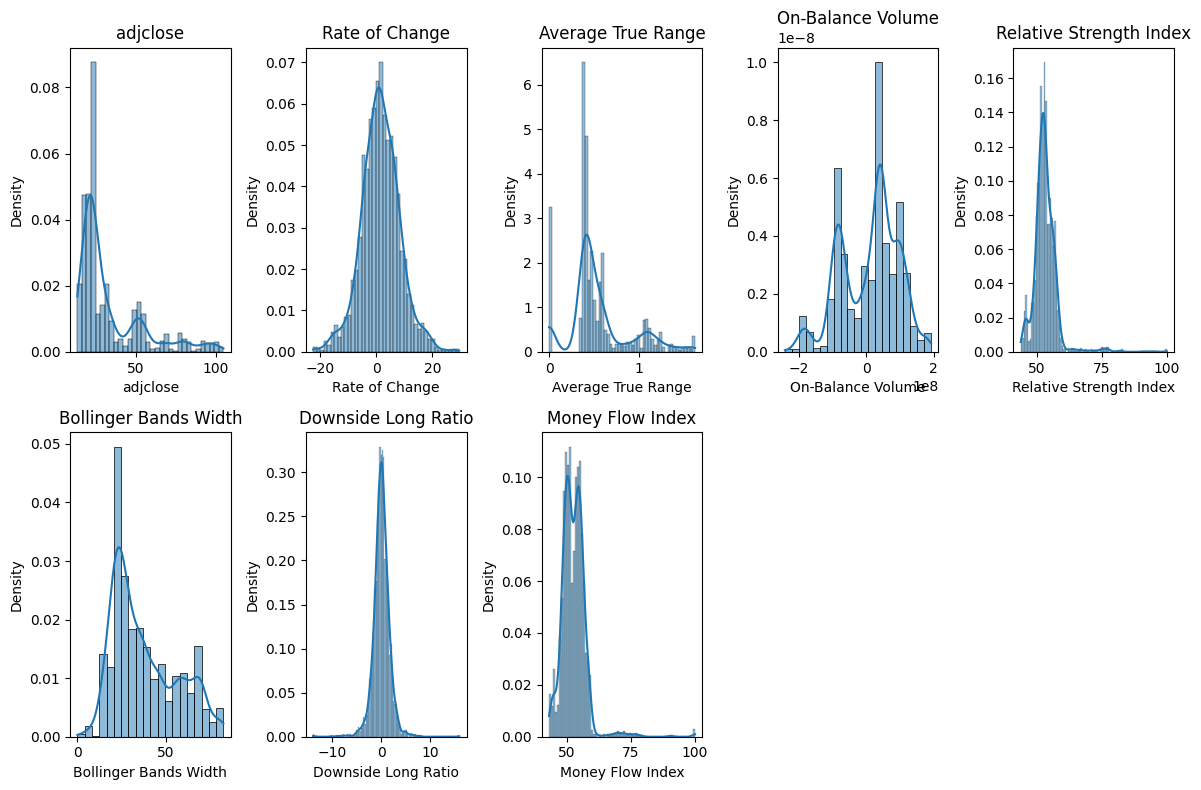

In [56]:
num_cols = 5
num_rows = (len(NVO_TA.columns) + num_cols - 1) // num_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the columns in NVO_TA
for i, column in enumerate(NVO_TA.columns):
    # Select the corresponding axis for the current subplot
    ax = axes[i]
    
    # Create the histplot for the current column
    sns.histplot(NVO_TA, x=column, kde=True, stat="density", ax=ax)
    
    # Set the title for the current subplot
    ax.set_title(column)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


plt.show()

## Splitting Data Into Test and Train Sets and Data Normalisation

#### Splitting the data

Dear Marker, please change  'NVO_MAW' on the 8th line to 'NVO_TA' OR vice versa to train the models on the technical Indicators or Moving Average Windows

In [92]:
NVO_MAW = df_features.iloc[:, 9:18] # Moving Averages
NVO_TA = df_features.iloc[:, 0:9] # Technical Indicators


X = NVO_TA
# Separate the target variable
y = df_features['Price_Rise']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



# Perform feature scaling separately for training and test sets
scaler = RobustScaler()

# Fit scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler from the training data
X_test_scaled = scaler.transform(X_test)


In [93]:
print(f'Moving Average: {NVO_MAW.columns}')
print(f'Technical Indicators: {NVO_TA.columns}')

Moving Average: Index(['Simple Moving Avg_20', 'Expo Moving Avg_20', 'STD_20', 'MIN_20',
       'MAX_20', 'Simple Moving Avg_50', 'Expo Moving Avg_50', 'STD_50',
       'MIN_50'],
      dtype='object')
Technical Indicators: Index(['adjclose', 'Rate of Change', 'Average True Range', 'On-Balance Volume',
       'Relative Strength Index', 'Bollinger Bands Width',
       'Downside Long Ratio', 'Money Flow Index', 'Daily Returns'],
      dtype='object')


Target Variable Distribution:
Price_Rise
1    1264
0    1251
Name: count, dtype: int64
Class Imbalance Ratio: 1.01


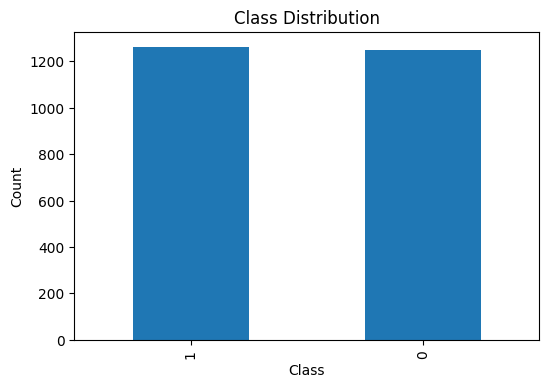

In [94]:
print("Target Variable Distribution:")
print(df_features['Price_Rise'].value_counts())

# Check class imbalance ratio
num_pos = df_features['Price_Rise'].sum()
num_neg = len(df_features['Price_Rise']) - num_pos
imbalance_ratio = max(num_pos, num_neg) / min(num_pos, num_neg)
print(f"Class Imbalance Ratio: {imbalance_ratio:.2f}")

# Visualize class imbalance
plt.figure(figsize=(6, 4))
df_features['Price_Rise'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Model Selection

#### Logistic Regression Model

In [95]:

logreg = LogisticRegression(max_iter=1000)



logreg.fit(X_train, y_train) # Fitting the model on the training data


y_pred = logreg.predict(X_test) # Predicting on the test data

precision = precision_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred)

# Compute F1-score
f1 = f1_score(y_test, y_pred)




# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("LogReg Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

LogReg Accuracy: 0.5278219395866455
Precision: 0.5382716049382716
Recall: 0.6646341463414634
F1-score: 0.5948158253751705
Cross-Validation Scores: [0.47619048 0.48275862 0.50132626 0.49602122 0.49867374]
Mean Accuracy: 0.49099406340785656
Standard Deviation of Accuracy: 0.009777246391153616


#### Random Forest Classification Model

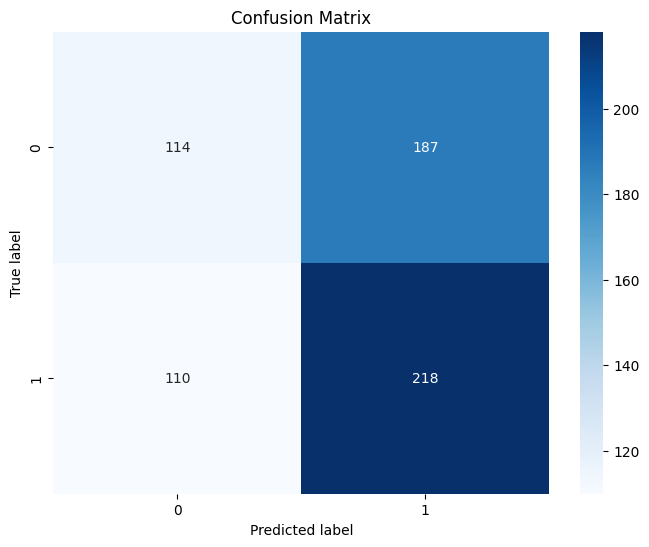

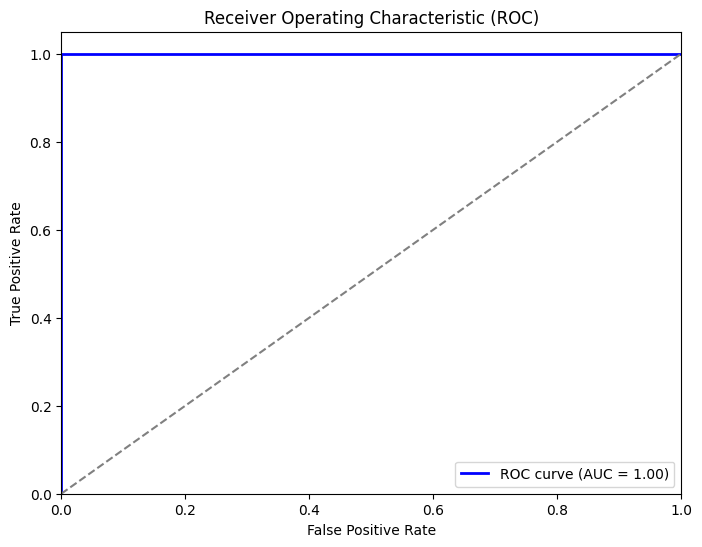

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       328

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629


Confusion Matrix:
[[301   0]
 [  0 328]]


In [96]:

# Instantiate the model
rf_classifier = RandomForestClassifier()

# Perform cross-validation to get predicted probabilities
y_pred_proba_cv = cross_val_predict(rf_classifier, X_train, y_train, cv=5, method='predict_proba')

# Extract probabilities of positive class
y_pred_proba = y_pred_proba_cv[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

# Compute AUC score
roc_auc = roc_auc_score(y_train, y_pred_proba)


cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Now let's evaluate the model and print the classification report and confusion matrix
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_test = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


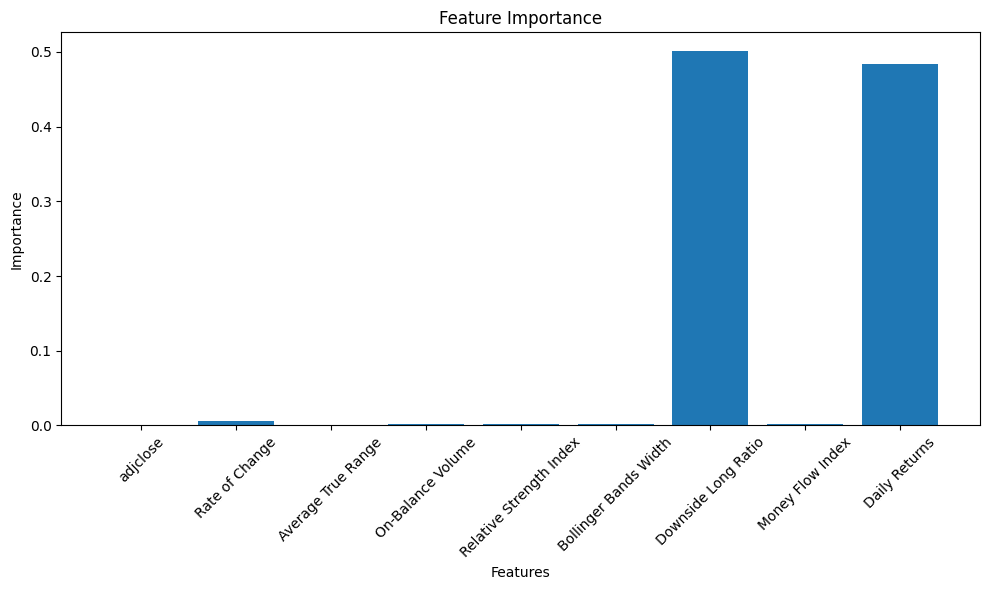

In [97]:
#Importance of classifiers For Technical Indicators
feature_importance = rf_classifier.feature_importances_
plt.figure(figsize=(10, 6))
feature_names = X.columns
plt.bar(range(len(feature_names)), feature_importance, align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

#### Market Returns vs Strategy Returns

In [ ]:
NVO_MAW['Market Returns'] = df_features['adjclose'].diff().fillna(0)

# Create Strategy Returns column based on predicted price rise
NVO_MAW['Strategy Returns'] = NVO_MAW['Market Returns'] * df_features['Price_Rise']

# Calculate Cumulative Market Returns and Cumulative Strategy Returns
NVO_MAW['Cumulative Market Returns'] = NVO_MAW['Market Returns'].cumsum()
NVO_MAW['Cumulative Strategy Returns'] = NVO_MAW['Strategy Returns'].cumsum()


In [ ]:
NVO_TA['Market Returns'] = df_features['adjclose'].diff().fillna(0)

# Create Strategy Returns column based on predicted price rise
NVO_TA['Strategy Returns'] = NVO_TA['Market Returns'] * df_features['Price_Rise']

# Calculate Cumulative Market Returns and Cumulative Strategy Returns
NVO_TA['Cumulative Market Returns'] = NVO_MAW['Market Returns'].cumsum()
NVO_TA['Cumulative Strategy Returns'] = NVO_MAW['Strategy Returns'].cumsum()

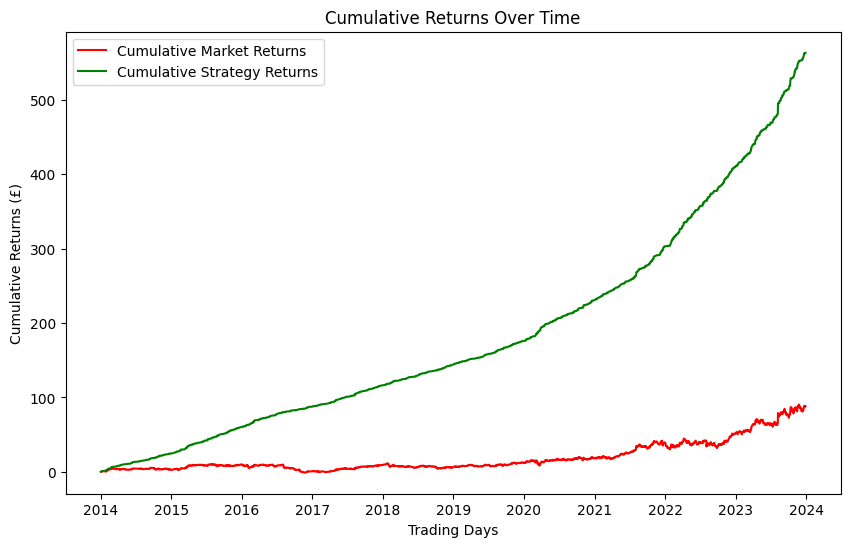

In [ ]:
# Plot the time series of Cumulative Market Returns and Cumulative Strategy Returns
plt.figure(figsize=(10, 6))
plt.plot(NVO_MAW.index, NVO_MAW['Cumulative Market Returns'], label='Cumulative Market Returns', color='red')
plt.plot(NVO_MAW.index, NVO_MAW['Cumulative Strategy Returns'], label='Cumulative Strategy Returns', color='green')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative Returns (£)')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.show()

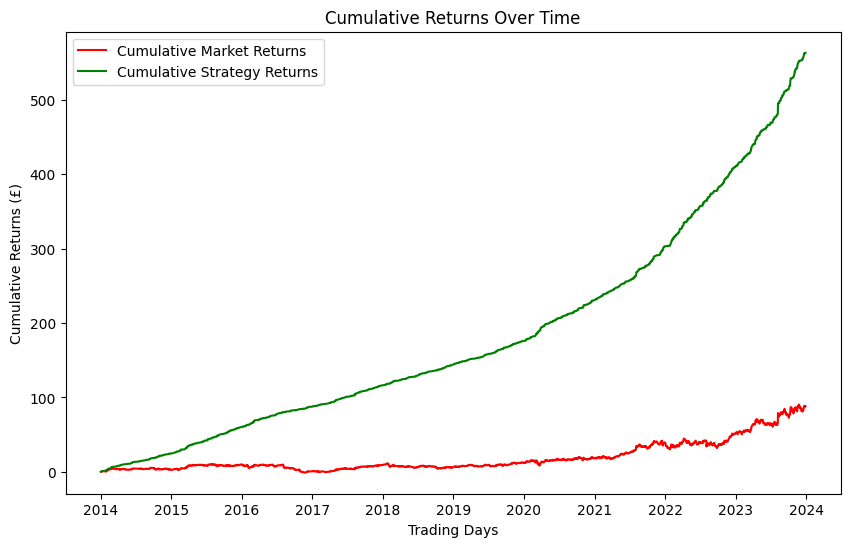

In [ ]:
# Plot the time series of Cumulative Market Returns and Cumulative Strategy Returns
plt.figure(figsize=(10, 6))
plt.plot(NVO_TA.index, NVO_TA['Cumulative Market Returns'], label='Cumulative Market Returns', color='red')
plt.plot(NVO_TA.index, NVO_TA['Cumulative Strategy Returns'], label='Cumulative Strategy Returns', color='green')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative Returns (£)')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.show()